Trabalho Computação estatística 2 - Python
Integrantes: João Vitor Rodrigues , Letícia Fonseca Souza, Maxsuell Nina

In [716]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score


In [717]:
dados_trab = ('/content/novo banco de dados2.xlsx')

In [718]:
dados_trab = pd.read_excel(dados_trab)

In [719]:
dados_trab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 16 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Qual sua idade?                                                                69 non-null     int64 
 1   Por quais motivos você decidiu entrar no curso?                                69 non-null     object
 2   Já fez uma  Graduação ou Curso Técnico na área de TI?                          69 non-null     int64 
 3   É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?  69 non-null     int64 
 4   Já sabia programar antes de entrar na UnB?                                     69 non-null     int64 
 5   Já está trabalhando ou estagiando na área de TI?                               69 non-null     int64 
 6   Como você se descreveria em termos d

In [720]:
dados_trab.describe()

,Qual sua idade?,Já fez uma Graduação ou Curso Técnico na área de TI?,É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?,Já sabia programar antes de entrar na UnB?,Já está trabalhando ou estagiando na área de TI?,Você viu alguma coisa de programação na escola?,Você veio de outra cidade para estudar na UnB?,Consegue estudar em casa com tranquilidade?,Consegue estudar na faculdade com tranquilidade?,Possui computador/notebook próprio?,Utiliza alguma instalação da UnB com computador?,Possui internet de qualidade no lugar onde mora?
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,24.826087,0.260870,0.637681,0.391304,0.188406,0.130435,0.188406,0.695652,0.768116,0.869565,0.130435,0.884058
std,9.022776,0.442326,0.484192,0.491618,0.393901,0.339248,0.393901,0.463502,0.425127,0.339248,0.339248,0.322501
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [721]:
dados_trab= dados_trab.dropna()

In [722]:
dados_trab

,Qual sua idade?,Por quais motivos você decidiu entrar no curso?,Já fez uma Graduação ou Curso Técnico na área de TI?,É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?,Já sabia programar antes de entrar na UnB?,Já está trabalhando ou estagiando na área de TI?,Como você se descreveria em termos de programação?,Fez o ensino médio em escola pública ou particular?,Você viu alguma coisa de programação na escola?,Você veio de outra cidade para estudar na UnB?,Quanto tempo demora para chegar na Universidade?,Consegue estudar em casa com tranquilidade?,Consegue estudar na faculdade com tranquilidade?,Possui computador/notebook próprio?,Utiliza alguma instalação da UnB com computador?,Possui internet de qualidade no lugar onde mora?
0,21,Por gostar do curso/Afinidade,1,0,1,0,Não tem muita experiência em programação,Particular,0,1,Entre 1 hora e 2 horas,0,1,1,0,1
1,36,Por gostar do curso/Afinidade,0,0,0,0,Não tem experiência em programação,Público,0,0,Entre 30 e 1 hora,0,0,0,1,0
2,22,Outros,0,0,0,0,Não tem experiência em programação,Público,0,1,Entre 1 hora e 2 horas,0,0,1,0,1
3,18,Por gostar do curso/Afinidade,0,1,0,0,Não tem muita experiência em programação,Público,0,0,Entre 30 e 1 hora,1,1,0,1,1
4,18,Conveniência de horário,0,0,0,0,Não tem muita experiência em programação,Público,0,0,Entre 30 e 1 hora,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,18,Por gostar do curso/Afinidade,0,1,0,0,Não tem experiência em programação,Público,1,1,Entre 1 hora e 2 horas,0,1,1,0,1
65,25,Desenvolvimento pessoal/profissional,1,1,0,0,Não tem muita experiência em programação,Particular,0,0,Entre 1 hora e 2 horas,0,1,1,0,1
66,31,Dinheiro,0,0,0,0,Não tem experiência em programação,Público,0,0,Entre 1 hora e 2 horas,0,0,0,1,0
67,19,Conveniência de horário,0,0,1,0,Tem um pouco de experiência em programação,Público,0,0,Entre 1 hora e 2 horas,1,1,1,0,0


In [723]:
x = dados_trab.drop(dados_trab.columns[3], axis=1)
y = dados_trab.iloc[:,3]

In [724]:
y

0     0
1     0
2     0
3     1
4     0
     ..
64    1
65    1
66    0
67    0
68    1
Name: É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?, Length: 69, dtype: int64

In [725]:
x_dummies = pd.get_dummies(x)

In [726]:
x_dummies

,Qual sua idade?,Já fez uma Graduação ou Curso Técnico na área de TI?,Já sabia programar antes de entrar na UnB?,Já está trabalhando ou estagiando na área de TI?,Você viu alguma coisa de programação na escola?,Você veio de outra cidade para estudar na UnB?,Consegue estudar em casa com tranquilidade?,Consegue estudar na faculdade com tranquilidade?,Possui computador/notebook próprio?,Utiliza alguma instalação da UnB com computador?,...,Como você se descreveria em termos de programação?_Não tem experiência em programação,Como você se descreveria em termos de programação?_Não tem muita experiência em programação,Como você se descreveria em termos de programação?_Tem muita experiência em programação,Como você se descreveria em termos de programação?_Tem um pouco de experiência em programação,Fez o ensino médio em escola pública ou particular?_Particular,Fez o ensino médio em escola pública ou particular?_Público,Quanto tempo demora para chegar na Universidade?_Entre 1 hora e 2 horas,Quanto tempo demora para chegar na Universidade?_Entre 30 e 1 hora,Quanto tempo demora para chegar na Universidade?_Mais de 2 horas,Quanto tempo demora para chegar na Universidade?_Menos de 30 minutos
0,21,1,1,0,0,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
1,36,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,22,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
3,18,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
4,18,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,18,0,0,0,1,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
65,25,1,0,0,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
66,31,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
67,19,0,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,1,0,0,0


In [727]:
y_dummies

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
64,0,1
65,0,1
66,1,0
67,1,0


In [728]:
x_dummies.describe()

,Qual sua idade?,Já fez uma Graduação ou Curso Técnico na área de TI?,Já sabia programar antes de entrar na UnB?,Já está trabalhando ou estagiando na área de TI?,Você viu alguma coisa de programação na escola?,Você veio de outra cidade para estudar na UnB?,Consegue estudar em casa com tranquilidade?,Consegue estudar na faculdade com tranquilidade?,Possui computador/notebook próprio?,Utiliza alguma instalação da UnB com computador?,...,Como você se descreveria em termos de programação?_Não tem experiência em programação,Como você se descreveria em termos de programação?_Não tem muita experiência em programação,Como você se descreveria em termos de programação?_Tem muita experiência em programação,Como você se descreveria em termos de programação?_Tem um pouco de experiência em programação,Fez o ensino médio em escola pública ou particular?_Particular,Fez o ensino médio em escola pública ou particular?_Público,Quanto tempo demora para chegar na Universidade?_Entre 1 hora e 2 horas,Quanto tempo demora para chegar na Universidade?_Entre 30 e 1 hora,Quanto tempo demora para chegar na Universidade?_Mais de 2 horas,Quanto tempo demora para chegar na Universidade?_Menos de 30 minutos
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,24.826087,0.260870,0.391304,0.188406,0.130435,0.188406,0.695652,0.768116,0.869565,0.130435,...,0.318841,0.347826,0.072464,0.260870,0.376812,0.623188,0.449275,0.217391,0.043478,0.289855
std,9.022776,0.442326,0.491618,0.393901,0.339248,0.393901,0.463502,0.425127,0.339248,0.339248,...,0.469441,0.479770,0.261154,0.442326,0.488137,0.488137,0.501065,0.415493,0.205425,0.457019
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [729]:
x_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 28 columns):
 #   Column                                                                                         Non-Null Count  Dtype
---  ------                                                                                         --------------  -----
 0   Qual sua idade?                                                                                69 non-null     int64
 1   Já fez uma  Graduação ou Curso Técnico na área de TI?                                          69 non-null     int64
 2   Já sabia programar antes de entrar na UnB?                                                     69 non-null     int64
 3   Já está trabalhando ou estagiando na área de TI?                                               69 non-null     int64
 4   Você viu alguma coisa de programação na escola?                                                69 non-null     int64
 5   Você veio de outra cidade para estudar

In [730]:
print(dados_trab.head())

   Qual sua idade? Por quais motivos você decidiu entrar no curso?   \
0               21                    Por gostar do curso/Afinidade   
1               36                    Por gostar do curso/Afinidade   
2               22                                           Outros   
3               18                    Por gostar do curso/Afinidade   
4               18                         Conveniência de horário    

   Já fez uma  Graduação ou Curso Técnico na área de TI?  \
0                                                  1       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?  \
0                                                  0                               
1                                           

In [731]:
dados_trab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 16 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Qual sua idade?                                                                69 non-null     int64 
 1   Por quais motivos você decidiu entrar no curso?                                69 non-null     object
 2   Já fez uma  Graduação ou Curso Técnico na área de TI?                          69 non-null     int64 
 3   É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?  69 non-null     int64 
 4   Já sabia programar antes de entrar na UnB?                                     69 non-null     int64 
 5   Já está trabalhando ou estagiando na área de TI?                               69 non-null     int64 
 6   Como você se descreveria em termos d

In [732]:
x = dados_trab.drop(dados_trab.columns[3], axis=1)
y = dados_trab.iloc[:,3]

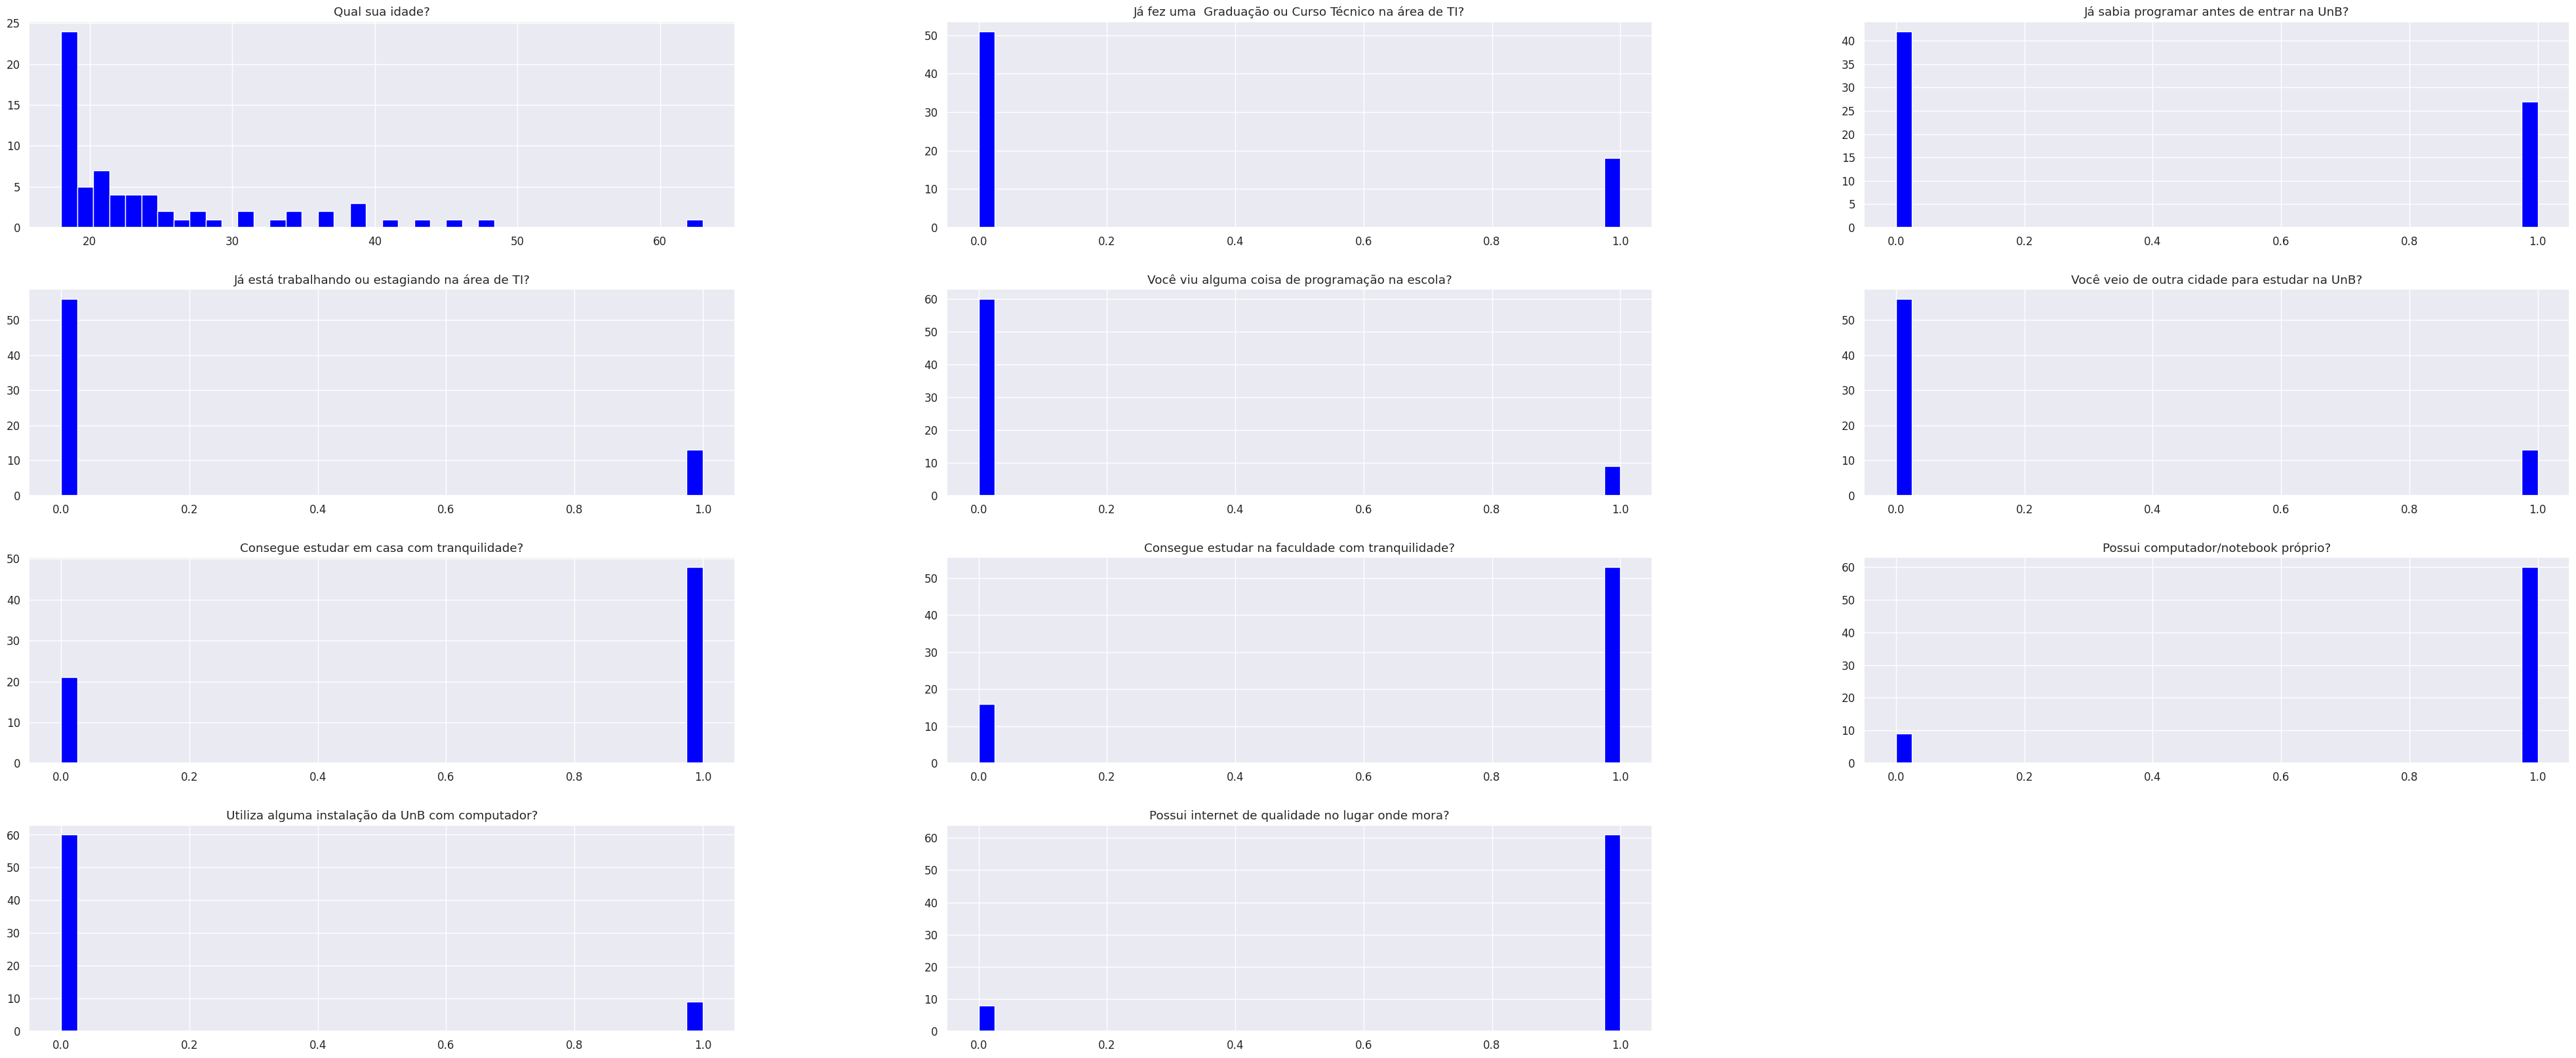

In [733]:
sns.set(font_scale=1.1,rc={'figure.figsize':(50,20)})
eixo = x.hist(bins=40, color='blue')

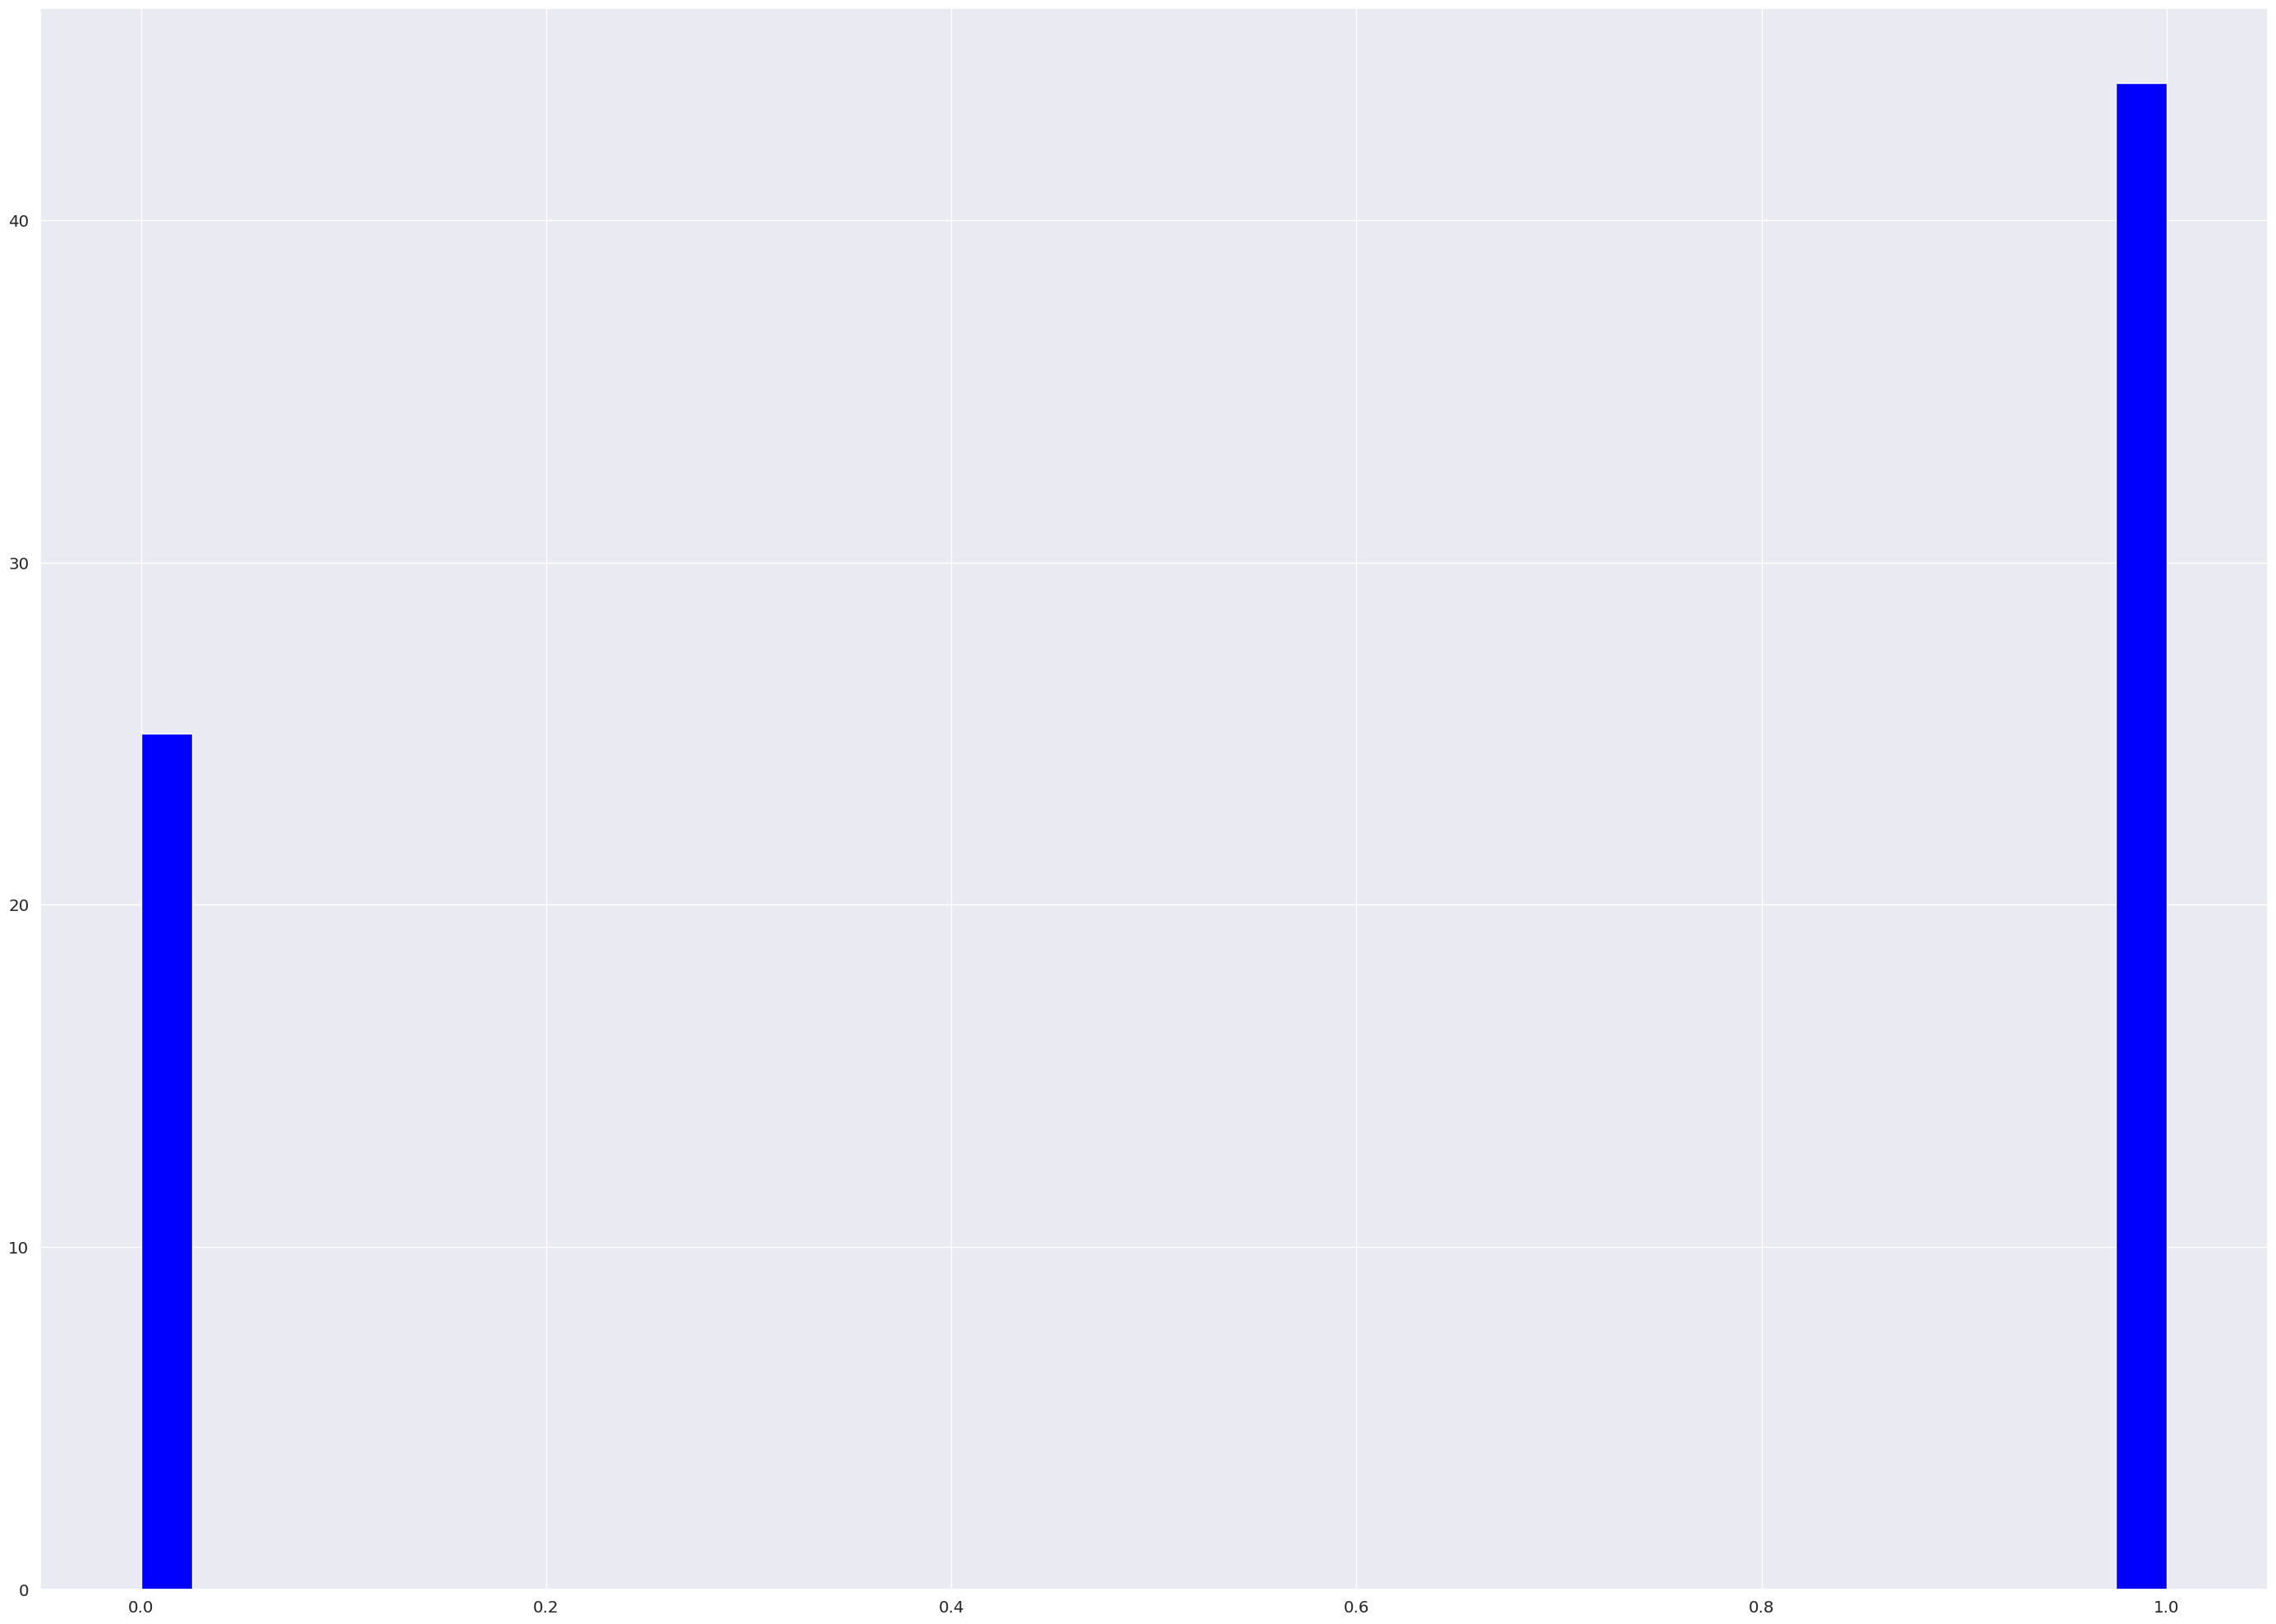

In [734]:
sns.set(font_scale=1.3,rc={'figure.figsize':(35,25)})
eixo = y.hist(bins=40, color='blue')

fazendo o modelo de regressão

In [735]:
x_train,x_test,y_train,y_test = ms.train_test_split(x_dummies, y, test_size = 0.20, random_state = 0)

Número de entradas

In [736]:
print(len(x_train))
print(len(x_test))

55
14


In [737]:
funcaologistica= LogisticRegression()
funcaologistica.fit(x_train,y_train)

LogisticRegression()

In [738]:
previs = funcaologistica.predict(x_test)

In [739]:
previs

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [740]:
y_test

63    0
34    1
57    0
66    0
49    0
43    1
7     0
62    0
67    0
41    1
27    1
30    1
33    1
31    0
Name: É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?, dtype: int64

vê se o modelo está acertando ou não(matriz de confusão)

In [741]:
LogReg = LogisticRegression()
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)

In [742]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [1.08865832]
Coefficients [[-0.55336086  0.79026567  0.39313658 -0.52582234  0.11295184 -0.30564259
   0.89878795 -0.50121365 -0.25957451 -0.27899459  0.64088266 -0.38543267
   0.42459424  0.1332016   0.15529965 -0.56208722 -0.0627925   0.19066972
   0.43088846  0.20516807 -0.53677165 -0.5167496  -0.33980391  0.33980391
  -0.0869859   0.1565715  -0.38324848  0.14747391]]


Em um modelo de regressão logística, os coeficientes representam o efeito de cada variável independente no log da razão de chances (odds ratio) de uma determinada categoria da variável dependente (ou classe) ocorrer em comparação com uma categoria de referência.

Os coeficientes são estimados pelo modelo durante o processo de ajuste usando os dados de treinamento. Cada coeficiente é atribuído a uma variável independente e indica a mudança esperada no log da razão de chances para um aumento unitário naquela variável, mantendo todas as outras variáveis constantes.

Vamos considerar um exemplo simples com um modelo de regressão logística binária com uma única variável independente (feature)
X e uma variável dependente binária
Y.

Se o coeficiente estimado para a variável
X for positivo (por exemplo,
α=
0.5
β=0.5), isso significa que um aumento de uma unidade na variável
X está associado a um aumento no log da razão de chances de ocorrer a categoria "1" da variável dependente. Por outro lado, se o coeficiente for negativo (por exemplo,
α=
−
0.5
β=−0.5), isso significa que um aumento de uma unidade na variável
X está associado a uma diminuição no log da razão de chances de ocorrer a categoria "1" da variável dependente.

Os coeficientes são muito importantes para interpretar o modelo de regressão logística e entender como cada variável independente contribui para a variável dependente. No entanto, é essencial interpretar os coeficientes em conjunto com outras métricas, como os valores-p (p-values) e as estatísticas de ajuste do modelo, para garantir uma interpretação correta e robusta do modelo.

In [743]:
print("Accuracy", LogReg.score(x_test, y_test))
print(classification_report(y_test, LogReg.predict(x_test)))

Accuracy 0.42857142857142855
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.33      0.33      0.33         6

    accuracy                           0.43        14
   macro avg       0.42      0.42      0.42        14
weighted avg       0.43      0.43      0.43        14



recall serve pra saber o quanto ele errou ao fazer o total de previsões,quando eu falo que quando o aluno faz a matéria mais de uma vez ele acertou 50%.

In [744]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[4, 4],
       [4, 2]])

Text(0.5, 2205.5555555555557, 'Predicted label')

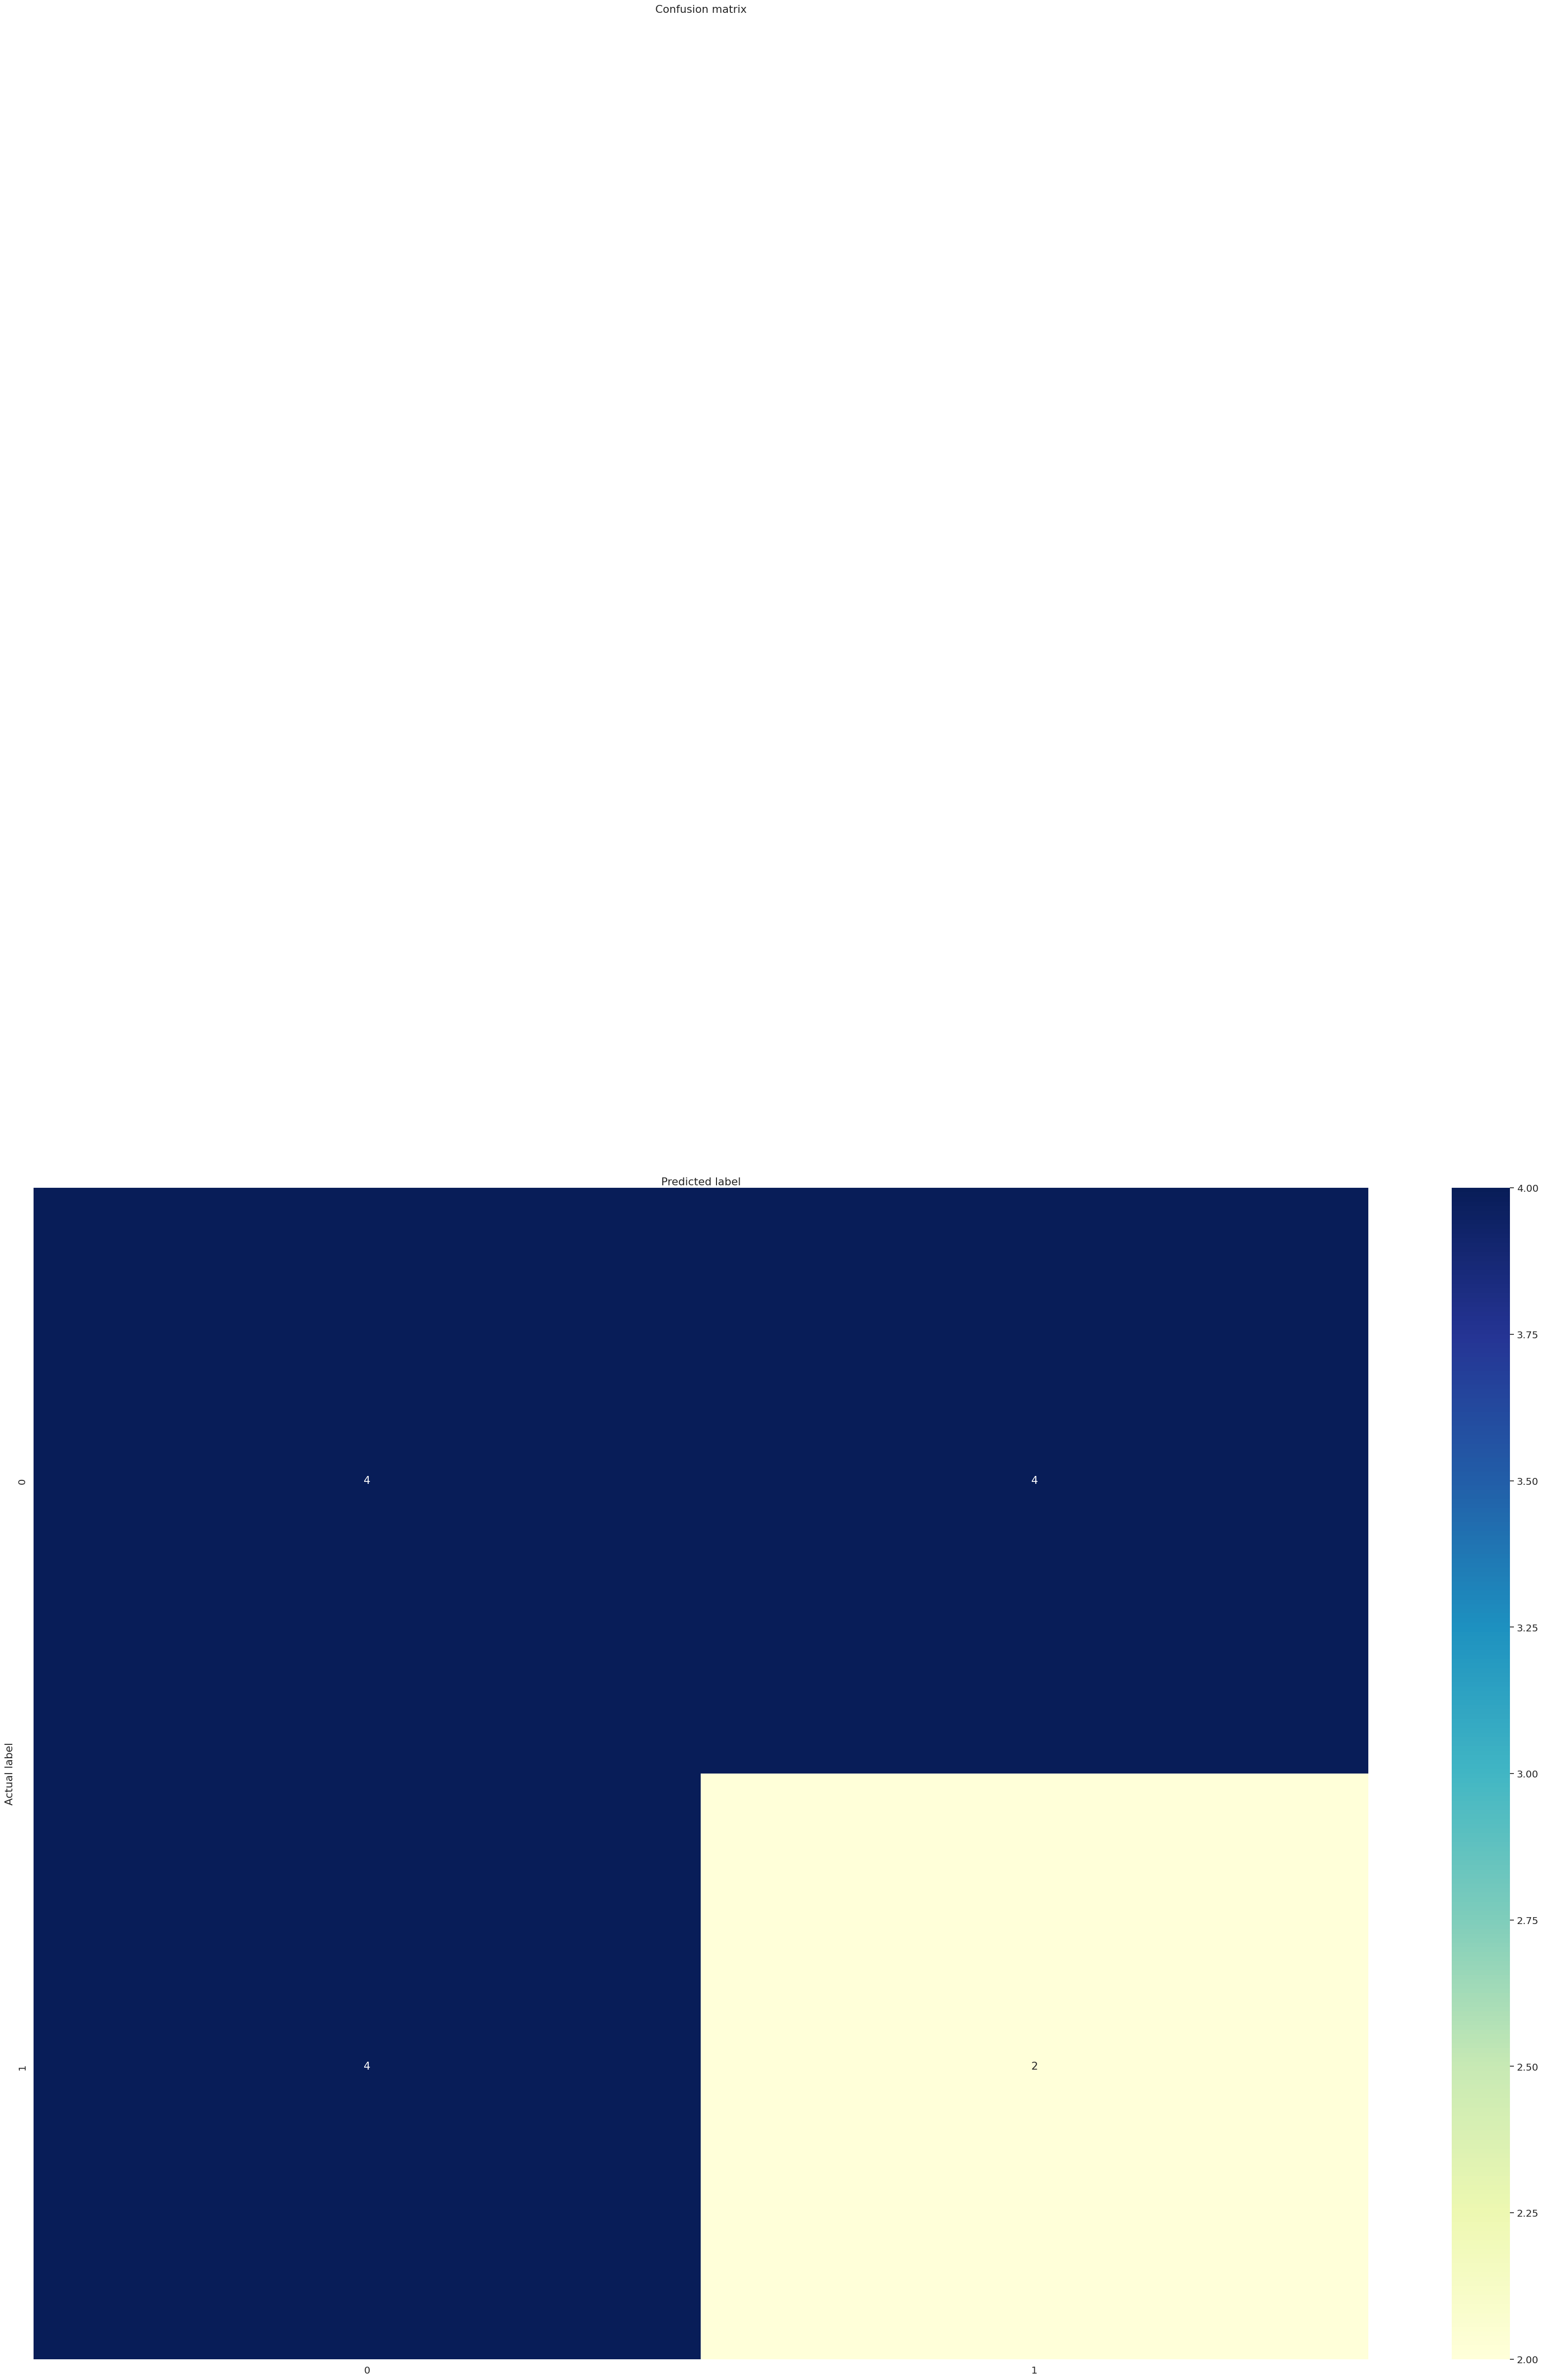

In [745]:
categories = [0,1]
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout(pad = 2)
plt.title('Confusion matrix', y=2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

interpretando a matriz de confusão

o que é 0 ele acertou 4 vezes e errou 4 vezes
no 1 ele errou 4 e acertou 2

In [746]:
pip install stepwise-regression

In [747]:
x = dados_trab.drop(dados_trab.columns[3], axis=1)
y = dados_trab.iloc[:,3]

In [749]:
X = sm.add_constant(x_dummies)

model = sm.OLS(y, x_dummies)

results = model.fit()

In [750]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                          OLS Regression Results                                                         
=========================================================================================================================================
Dep. Variable:     É a sua primeira vez cursando Algoritmos e Programação de Computadores (APC)?   R-squared:                       0.315
Model:                                                                                       OLS   Adj. R-squared:                 -0.059
Method:                                                                            Least Squares   F-statistic:                    0.8418
Date:                                                                           Wed, 07 Feb 2024   Prob (F-statistic):              0.669
Time:                                                                                   23:57:07   Log-Likelihood:                -34.323
No. Observations:                                                                             69   AIC:                             118.6
Df Residuals:                                                                                 44   BIC:                             174.5
Df Model:                                                                                     24                                         
Covariance Type:                                                                       nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Qual sua idade?                                                                                  -0.0046      0.009     -0.518      0.607      -0.023       0.013
Já fez uma  Graduação ou Curso Técnico na área de TI?                                             0.2744      0.193      1.422      0.162      -0.115       0.663
Já sabia programar antes de entrar na UnB?                                                        0.0886      0.207      0.429      0.670      -0.328       0.505
Já está trabalhando ou estagiando na área de TI?                                                 -0.1459      0.223     -0.653      0.517      -0.596       0.304
Você viu alguma coisa de programação na escola?                                                   0.0592      0.216      0.274      0.786      -0.377       0.495
Você veio de outra cidade para estudar na UnB?                                                   -0.0062      0.217     -0.028      0.978      -0.444       0.432
Consegue estudar em casa com tranquilidade?                                                       0.2676      0.166      1.613      0.114      -0.067       0.602
Consegue estudar na faculdade com tranquilidade?                                                 -0.0450      0.167     -0.270      0.789      -0.382       0.292
Possui computador/notebook próprio?                                                              -0.1085      0.225     -0.482      0.632      -0.562       0.345
Utiliza alguma instalação da UnB com computador?                                                 -0.1884      0.261     -0.723      0.474      -0.714       0.337
Possui internet de qualidade no lugar onde mora?                                                  0.4141      0.293      1.412      0.165      -0.177       1.005
Por quais motivos você decidiu entrar no curso? _Conveniência de horário                         -0.0314      0.227     -0.138      0.891      -0.489       0.426
Por 

In [751]:
backselect = step_reg.backward_regression(x_dummies, y, 0.05,verbose=False)
backselect

['Possui internet de qualidade no lugar onde mora?',
 'Por quais motivos você decidiu entrar no curso? _Outros']